In [1]:
import mylibrary.nnlib as nn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Least squares

In [3]:
def regression(x,y):
    n = len(x)
    sy = np.sum(y)
    sx = np.sum(x)
    sx2 = np.sum(np.square(x))
    sxy = np.sum(x*y)

    # y = mx+c
    z = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy)/z
    c = (sy*sx2 - sx*sxy)/z
    return m, c

def output(x, m, c):
    return m*x+c

def error(target, output):
    return np.sqrt(np.square(target-output).mean())

In [4]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

In [5]:
m_t, c_t = regression(x, y)
m_t, c_t

(1.1177914365590549, 0.12382037342561769)

In [6]:
n = len(x)

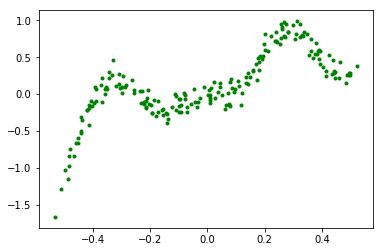

In [7]:
plt.scatter(x, y, marker='.', color='g')

In [8]:
m = np.random.exponential()*2
c = np.random.randn()
m,c

(0.4793575207647644, -0.05512928708389521)

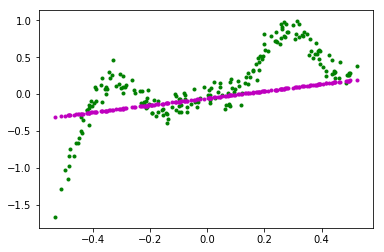

In [9]:
yhat1 = m*x+c
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat1, marker='.', color='m')

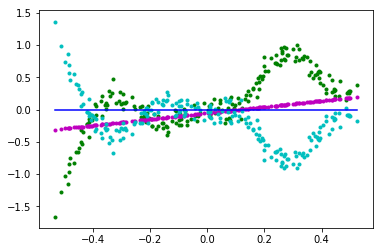

In [10]:
dy1 = yhat1-y
# dy1 = y - yhat1

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat1, marker='.', color='m')
plt.scatter(x, dy1, marker='.', color='c')
plt.plot(x,np.zeros_like(x), c='b')

-0.17991265193661138


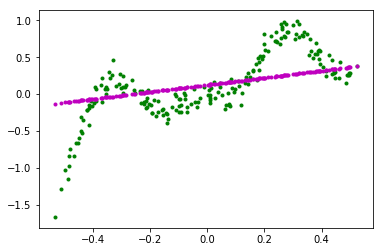

In [11]:
dc = dy1.mean()
print(dc)
yhat2 = m*x+ (c-dc)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat2, marker='.', color='m')

-0.05492779289377214


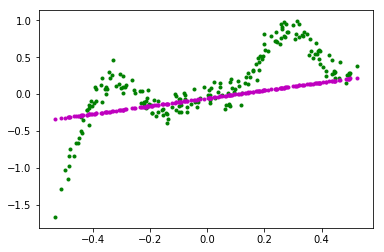

In [12]:
dm = x.T.dot(dy1) * 1/n
print(dm)
yhat2 = (m-dm)*x+c
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat2, marker='.', color='m')

In [16]:
dm_ = np.dot(x, dy1)/n
print(dm_)

-0.05492779289377214


In [13]:
print(m_t, c_t, '\t targeted')
print(m, c, '\t initial')
print(dm, dc, '\t gradient')
print(m-dm, c-dc, '\t updated')

1.1177914365590549 0.12382037342561769 	 targeted
0.4793575207647644 -0.05512928708389521 	 initial
-0.05492779289377214 -0.17991265193661138 	 gradient
0.5342853136585366 0.12478336485271617 	 updated


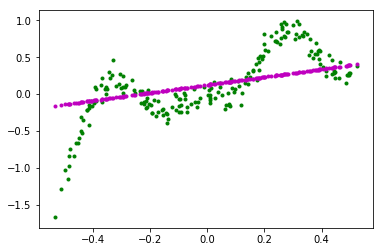

In [14]:
yhat3 = (m-dm)*x+ (c-dc)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yhat3, marker='.', color='m')